# School Matcher Graph Demo

This notebook demonstrates using the SchoolMatch AI project with LangGraph.

## 1. Setup and Imports

In [1]:
import suppress_warnings
# Set LangSmith project BEFORE any langchain imports
import os
os.environ["LANGCHAIN_PROJECT"] = "schoolmatch"

from dotenv import load_dotenv
load_dotenv()

from langchain_app.school_matcher_graph import (
    create_school_matcher_graph, run_school_matcher, create_graph_config
)
from db.college_vector_store import CollegeVectorStore

Warning filters applied successfully


## 2. Initialize Components

In [2]:
# Enable LangSmith tracing 
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "schoolmatch"

In [3]:
# Initialize the vector store
vector_store = CollegeVectorStore()

# Create the graph
graph = create_school_matcher_graph(vector_store)

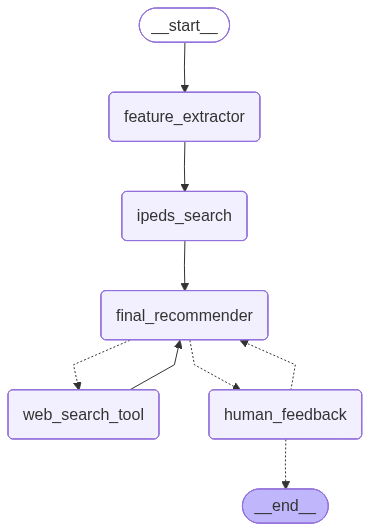

In [4]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

## 3. Run School Matcher

In [ ]:
from langsmith import tracing_context

# Run the graph with a sample university
school_name = "Seattle University"

with tracing_context(project_name="schoolmatch"):
    config = create_graph_config()
    result = run_school_matcher(graph, school_name, config)